<a href="https://colab.research.google.com/github/akhil14shukla/IME672A-Course-Project/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import ppscore as pps
from sklearn import metrics               
from sklearn import preprocessing
from sklearn import utils
%matplotlib inline

Taking csv data as input

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/akhil14shukla/IME672A-Course-Project/master/hmeq.csv")


In [3]:
# sns.pairplot(df)

## Understanding the Data

In [4]:
print(df.dtypes)

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


Most of the data is already numerical, only two are of strings type.

**We need to fill these two variables null values and OneHot Encode them to plot their distribution efficiently.<br><br>**
Reason/Meaning of null values in REASON and JOB, and how we will fill these:<br><br>
REASON - This shows the reason why the person is taking the loan. There are two available values : Debt consolidation and Home Improvement. Thus, missing value must denote that the reason was other than the two available options. So, we will fill the null values with _"Other reasons"_.

In [5]:
df["REASON"].fillna("Other reason",inplace=True)

In [6]:
print(df["JOB"].isna().sum())
print(df["JOB"].value_counts())
# We can fill the missing values with the mode, i.e. "Other", or we can fill the missing values depending on the distribution of the non-null values. 
df["JOB"].fillna(df["JOB"].mode()[0],inplace=True)
print(df["JOB"].isna().sum())

279
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
0


In [7]:
df = df.join(pd.get_dummies(df["JOB"]))
df = df.join(pd.get_dummies(df["REASON"]))
df.drop(["JOB", "REASON"],axis=1, inplace=True)

Plotting Boxplots for each attribute in df

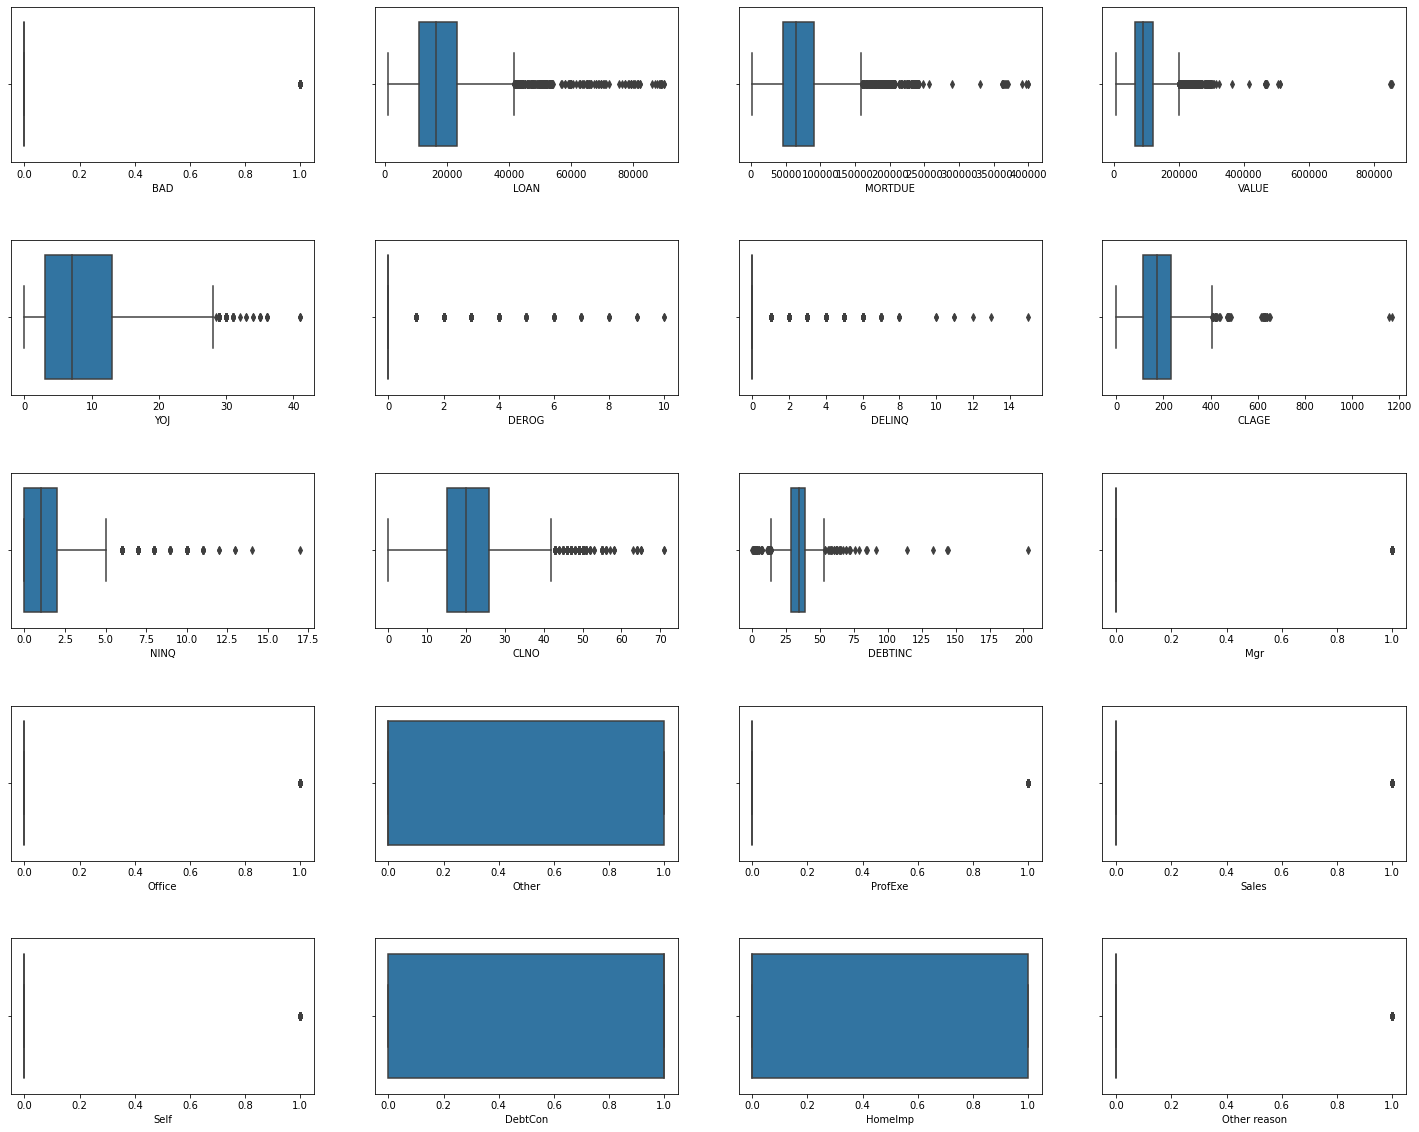

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.boxplot(data=df, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

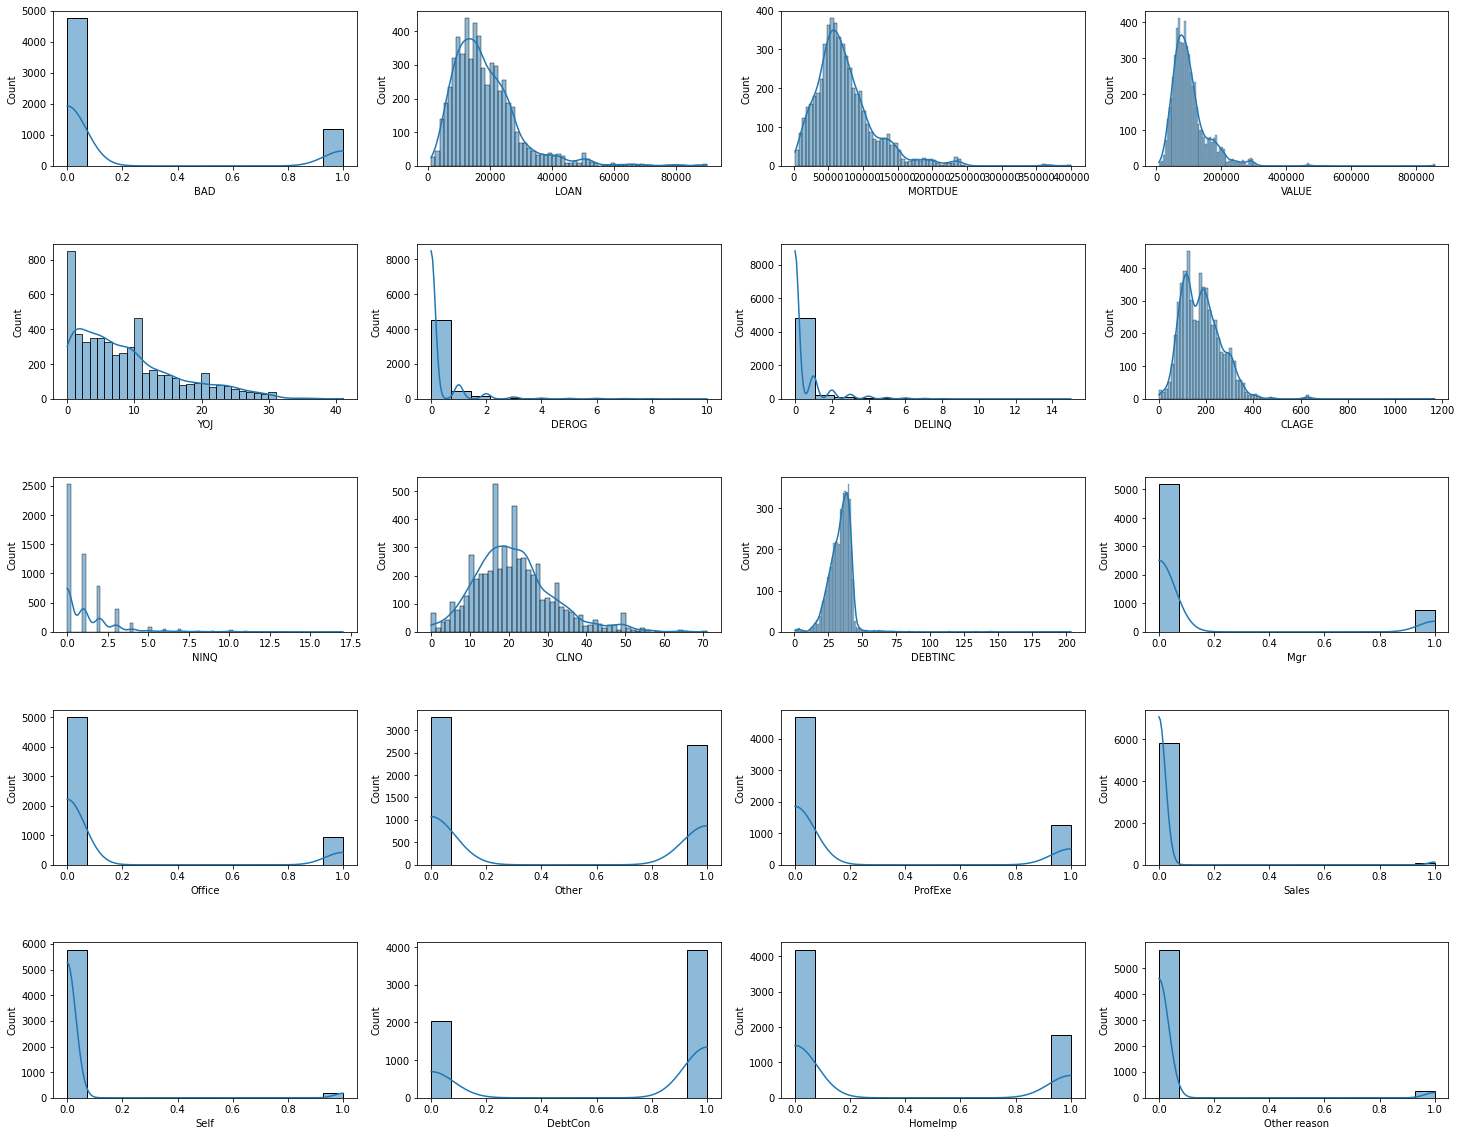

In [12]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


/home/akhil/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOAN'>

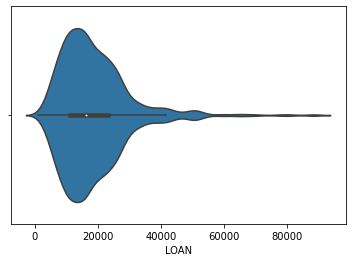

In [37]:
sns.violinplot(df["LOAN"])

In [7]:
# Calculating the number of missing values in each attributes
print(df.isna().sum())
# Number of rows/tuples where more than 3 attributes are missing
sum((df.isna().sum(axis=1))>3)

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


339

We can consider those tuples where more than 3 attributes are missing

Reason/Meaning of null values in dataset, and how we will fill these:<br><br>
REASON - This shows the reason why the person is taking the loan. There are two available values : Debt consolidation and Home Improvement. Thus, missing value must denote that the reason was other than the two available options. So, we will fill the null values with _"Other reasons"_.

In [9]:
df[df["MORTDUE"].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,Other reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
41,1,3000,NaN,33000.0,HomeImp,Other,1.0,0.0,1.0,23.300000,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,53700,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940
5883,0,53800,NaN,81322.0,HomeImp,Self,9.0,0.0,0.0,171.447555,0.0,22.0,24.709060
5884,0,53900,NaN,91309.0,HomeImp,Other,NaN,0.0,0.0,349.795748,0.0,6.0,22.061330
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN


In [11]:
# Temporary filling the rest null values with 0
df.fillna(0,inplace=True)

In [ ]:
# Using Predictive Power Score to see whether the attributes are independently able to predict the defaulters
# df_pps = df.join(y)
# score = pps.matrix(df_pps)
# print(score[score['y']=='BAD'])

In [20]:
def pps(df,categorical_features=None,numerical_features=None):
    columns = ["Feature", "Target","PPS", "Type of Prediction", "Cross-Val Score", "Training Score","Naive-Baseline Score", "Model"]
    pps_df=pd.DataFrame(columns=columns)
    for i in df.columns:
        for j in df.columns:
            if(j in categorical_features or type(df[j])==str):
                model = DecisionTreeClassifier()
                lab_enc = preprocessing.LabelEncoder()
                label_encoded_y = np.array(lab_enc.fit_transform(df[j])).reshape(-1,1)
                x_train,x_test,y_train,y_test = train_test_split(np.array(df[i]).reshape(-1,1),label_encoded_y)
                model.fit(x_train,y_train)
                y_pred=model.predict(x_test)
                f1 = metrics.f1_score(y_test,y_pred)
                mode = np.full((len(x_test),1),df[j].mode())
                f1_naive = metrics.f1_score(y_test,mode)
                pps_score=max(0,(f1-f1_naive)/(1 - f1_naive))
                cv_score=model.score(x_test,y_test)
                train_score=model.score(x_train,y_train)
                pps_df = pps_df.append({"Feature":i,"Target":j,"PPS":pps_score,"Type of Prediction":"Classification","Cross-Val Score":cv_score,"Training Score":train_score,"Naive-Baseline Score":f1_naive,"Model":"DecisionTreeClassifier()"},ignore_index=True)
            else:
                model = DecisionTreeRegressor()
                # lab_enc = preprocessing.LabelEncoder()
                # label_encoded_y = np.array(lab_enc.fit_transform(df[j])).reshape(-1,1)
                x_train,x_test,y_train,y_test = train_test_split(np.array(df[i]).reshape(-1,1),np.array(df[j]).reshape(-1,1))
                model.fit(x_train,y_train)
                median = np.full((len(x_test),1),df[j].median())
                naive_mae = metrics.mean_absolute_error(y_test, median)
                y_pred=model.predict(x_test)
                mae=metrics.mean_absolute_error(y_test,y_pred)
                train_score=model.score(x_train,y_train)
                pps_score = max(0,1 - mae/naive_mae)
                pps_df=pps_df.append({"Feature":i,"Target":j,"PPS":pps_score,"Type of Prediction":"Regression","Cross-Val Score":cv_score,"Training Score":train_score,"Naive-Baseline Score":naive_mae,"Model":"DecisionTreeRegressor()"},ignore_index=True)
    
    return pps_df
categ = ["BAD"]
pps_f = pps(df,categ)

In [23]:
pps_f[pps_f["Target"]=="BAD"]

,Feature,Target,PPS,Type of Prediction,Cross-Val Score,Training Score,Naive-Baseline Score,Model
0,BAD,BAD,1.000000,Classification,1.000000,1.000000,0.0,DecisionTreeClassifier()
20,LOAN,BAD,0.282297,Classification,0.798658,0.823714,0.0,DecisionTreeClassifier()
40,MORTDUE,BAD,0.271012,Classification,0.714765,0.961074,0.0,DecisionTreeClassifier()
60,VALUE,BAD,0.336163,Classification,0.737584,0.973826,0.0,DecisionTreeClassifier()
80,YOJ,BAD,0.104348,Classification,0.792617,0.822819,0.0,DecisionTreeClassifier()
100,DEROG,BAD,0.242254,Classification,0.819463,0.809620,0.0,DecisionTreeClassifier()
120,DELINQ,BAD,0.292683,Classification,0.824832,0.815436,0.0,DecisionTreeClassifier()
140,CLAGE,BAD,0.281739,Classification,0.722819,0.969575,0.0,DecisionTreeClassifier()
160,NINQ,BAD,0.132530,Classification,0.806711,0.799776,0.0,DecisionTreeClassifier()
180,CLNO,BAD,0.049470,Classification,0.819463,0.802013,0.0,DecisionTreeClassifier()


In [14]:
df["BAD"].mode()

0    0
dtype: int64

Building the Model

In [ ]:
# Dividing the dataset into training and cross-validation
y = df["BAD"]
df.drop(["BAD"],axis=1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df,y)

In [ ]:
# Training Decision Tree Model
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

Testing the models on cross-validation dataset, and comparing with training dataset

In [ ]:
print("Accuracy on Training Dataset : ",dtree.score(x_train,y_train))
print("Accuracy on CV Dataset : ",dtree.score(x_test,y_test))